In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib.dates as mdates
import pytz


#df = pd.read_json('~/Desktop/315output-save.json', lines=True)
df = pd.read_json('~/Desktop/315output.json', lines=True)

print(df.columns)
#print(df.shape)

df.drop_duplicates('time', inplace = True)
df.reset_index(inplace=True)

print(df.shape)

df['time'] = pd.to_datetime(df['time'])

print(df.value_counts('model'))
#print(df.loc[df.model == 'Abarth-124Spider'])

Venza_Hits = df.loc[df.model == 'PMV-107J']
# Venza_Hits = df.loc[df.model == 'Abarth-124Spider']

print(Venza_Hits.value_counts('id'))
Venza_Hits.dropna(axis=1, how='all')
#print(Venza_Hits)

#Venza0 = Venza_Hits.loc[Venza_Hits.id == '0aeef7f7']
#Venza0 = Venza_Hits.loc[Venza_Hits.id == '05b4cf21']
#Venza0 = Venza_Hits.loc[Venza_Hits.id == '0a3157f2']

sensors = ['0aeef7f7', "0a3157f2", '05b4cf21', '0f43c8f4']
Venza = Venza_Hits.loc[Venza_Hits.id == sensors[3]]

TIME_START = dt(2023, 3, 28, 12, 00, 00) #dt.datetime("2024-03-23")
TIME_STOP = dt(2025, 3, 30, 00, 00, 00) #dt.datetime("2024-03-23")

mask = (Venza['time'] > TIME_START) & (Venza['time'] <= TIME_STOP)
Venza = Venza.loc[mask]

print(Venza)


Index(['time', 'protocol', 'model', 'type', 'id', 'status', 'battery_ok',
       'counter', 'failed', 'pressure_PSI', 'temperature_F', 'mic', 'mod',
       'freq1', 'freq2', 'rssi', 'snr', 'noise', 'flags', 'freq', 'moving',
       'learn', 'code', 'unknown', 'unknown_3', 'wheel', 'state', 'repeat',
       'maybe_battery', 'centrifugal_acc', 'has_tick', 'tick', 'cmd1', 'cmd2',
       'err1', 'err2', 'pilot', 'light', 'thermostat', 'power', 'front', 'fan',
       'aux', 'flame', 'id0', 'id1', 'switch_id', 'remote_id', 'button_id',
       'fixed', 'rolling', 'channel', 'command', 'value', 'triggered',
       'storage', 'subtype', 'switch1', 'switch2', 'switch3', 'switch4',
       'switch5', 'raw_message'],
      dtype='object')
(49701, 64)
model
PMV-107J               48531
Abarth-124Spider         457
Toyota                   313
Schrader-SMD3MA4         110
Schrader-EG53MA4          63
Ford                      57
Citroen                   54
Proflame2-Remote          47
Hyundai-VDO   

temp/pressure normalized average: 0.03099581157326759
temp/pressure max delta: 0.04531376778667928
temp/pressure stdev: 0.013624111060267619


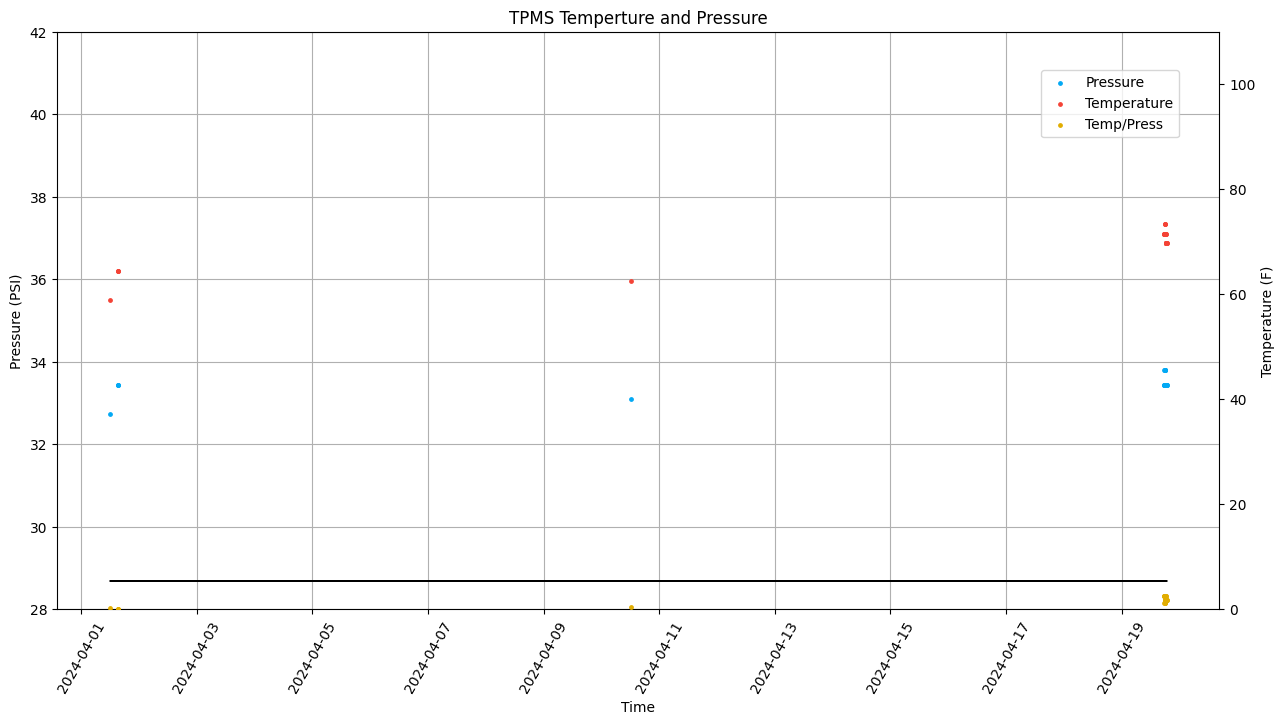

In [198]:
pressure_color =    "#03a9f4"
temp_color =        "#f44336" 
norm_color =        "#e1ad01"

ratio = [2,1]
scale = 7.5
size = [x * scale for x in ratio]
fig=plt.figure(figsize=(size[0],size[1]))

ax=fig.add_subplot(111, label="1")

ax.set_title("TPMS Temperture and Pressure")
ax.tick_params(axis='x', colors="k", rotation=60)
ax.set_xlabel("Time", color="k")
ax.grid(which='major')

# Pressure
ax.scatter(np.array(Venza['time']), np.array(Venza['pressure_PSI']), color=pressure_color, s=6, label='Pressure')
ax.set_ylabel("Pressure (PSI)", color="k")
ax.tick_params(axis='y', colors="k")
ax.set_ylim(28, 42)

# Temperature
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax2.scatter(np.array(Venza['time']), np.array(Venza['temperature_F']), color=temp_color, s=6, label='Temperature')
ax2.xaxis.set_visible(False)
ax2.set_ylabel('Temperature (F)', color="k") 
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylim(0, 110)

# Normalized (T/P - cT) plot
ax3=fig.add_subplot(111, label="3", frame_on=False)
#normalized = (np.array(Venza0['temperature_F']) ) / np.array(Venza0['pressure_PSI']) - np.array(Venza0['pressure_PSI'])*.25
normalized = (np.array(Venza['temperature_F']) ) / np.array(Venza['pressure_PSI']) - np.array(Venza['temperature_F'])*.0236
normalized = abs(normalized - np.min(normalized))

ax3.scatter(np.array(Venza['time']), normalized, color=norm_color, s=6, label='Temp/Press')
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
norm_min = 0
norm_max = 2
ax3.set_ylim(norm_min, norm_max)

# V(P, T) = nRT/P
# V = c1*T + c0*P
print(f"temp/pressure normalized average: {np.average(normalized)}")
print(f"temp/pressure max delta: {np.max(normalized) - np.min(normalized)}")
print(f"temp/pressure stdev: {np.std(normalized)}")

# Threshold Bar
ax4 = fig.add_subplot(111, label="4", frame_on=False)
threshold = .1
ax4.plot(np.array(Venza['time']), np.full(shape=Venza.shape, fill_value=threshold), color="k", linewidth=.1)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.set_ylim(norm_min, norm_max)

# Legend
leg = fig.legend(loc=[.81, .81])

plt.show()

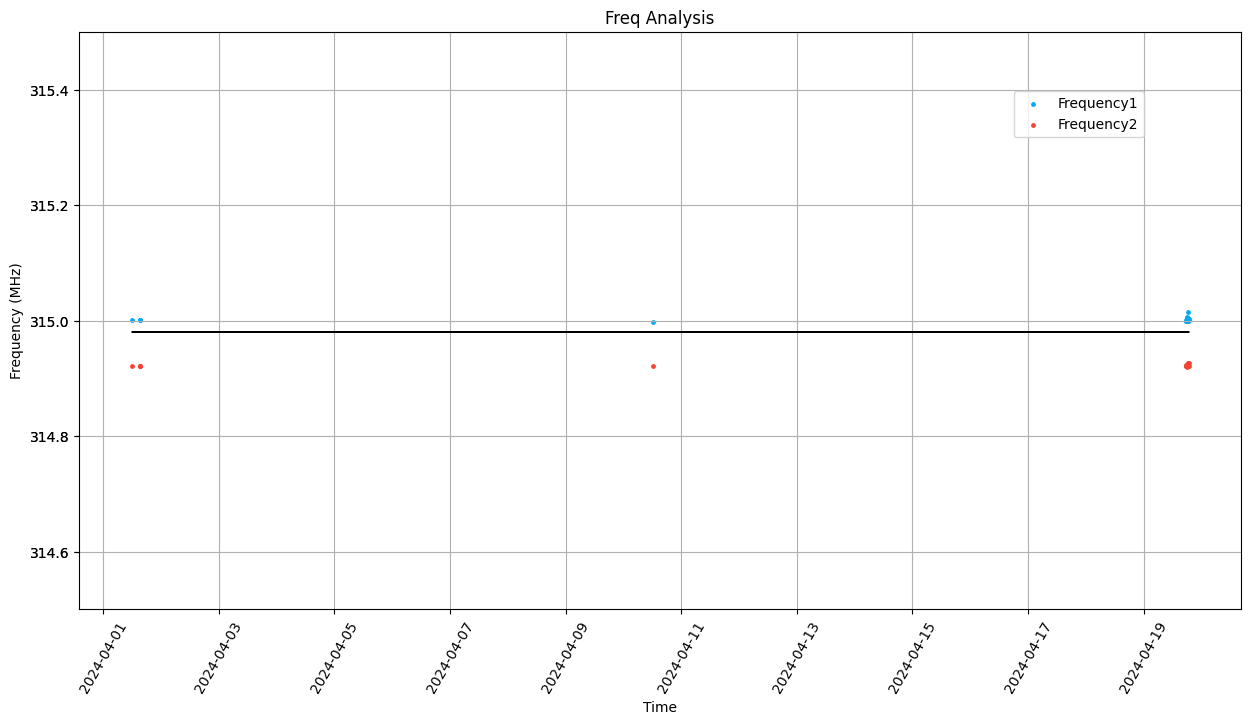

In [199]:
pressure_color =    "#03a9f4"
temp_color =        "#f44336" 
norm_color =        "#e1ad01"

ratio = [2,1]
scale = 7.5
size = [x * scale for x in ratio]

# Venza_Hits = Venza_Hits.loc[Venza_Hits.id == sensors[0]]
mask = (Venza_Hits['time'] > TIME_START) & (Venza_Hits['time'] <= TIME_STOP)
Venza_Hits = Venza_Hits.loc[mask]

fig2=plt.figure(figsize=(size[0],size[1]))

ax=fig2.add_subplot(111, label="1")

ax.set_title("Freq Analysis")
ax.tick_params(axis='x', colors="k", rotation=60)
ax.set_xlabel("Time", color="k")
ax.grid(which='both')
display_freq_low = 314.5
display_freq_high = 315.5

# Pressure
ax.scatter(np.array(Venza['time']), np.array(Venza['freq1']), color=pressure_color, s=6, label='Frequency1')
ax.set_ylabel("Frequency (MHz)", color="k")
ax.tick_params(axis='y', colors="k")
ax.set_ylim(display_freq_low, display_freq_high)

# Temperature
ax2=fig2.add_subplot(111, label="2", frame_on=False)
ax2.scatter(np.array(Venza['time']), np.array(Venza['freq2']), color=temp_color, s=6, label='Frequency2')
ax2.xaxis.set_visible(False)
ax2.set_ylim(display_freq_low, display_freq_high)

# Threshold Bar
ax3 = fig2.add_subplot(111, label="4", frame_on=False)
center = 314.98
ax3.plot(np.array(Venza['time']), np.full(shape=Venza.shape, fill_value=center), color="k", linewidth=.1)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.set_ylim(display_freq_low, display_freq_high)

# Legend
leg = fig2.legend(loc=[.81, .81])

plt.show()

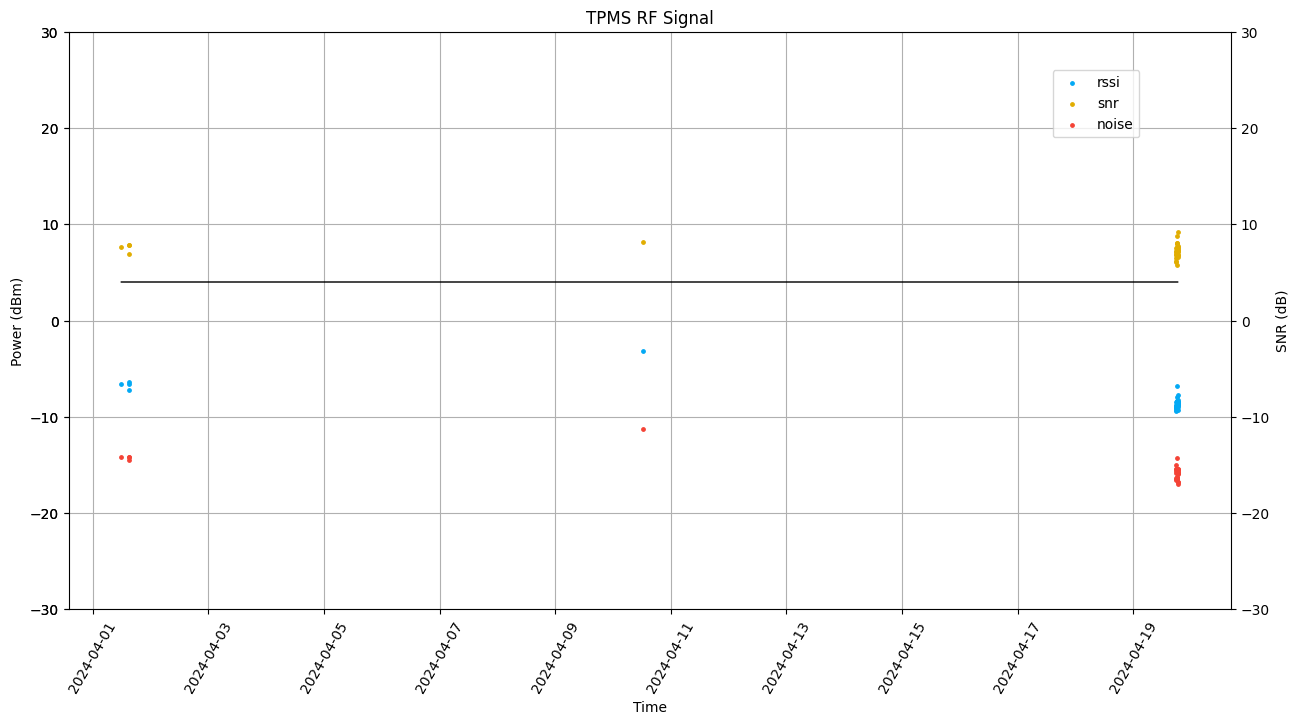

In [200]:
pressure_color =    "#03a9f4"
temp_color =        "#f44336" 
norm_color =        "#e1ad01"

ratio = [2,1]
scale = 7.5
size = [x * scale for x in ratio]
fig3=plt.figure(figsize=(size[0],size[1]))

ax=fig3.add_subplot(111, label="5")

ax.set_title("TPMS RF Signal")
ax.tick_params(axis='x', colors="k", rotation=60)
ax.set_xlabel("Time", color="k")
ax.grid(which='major')

# Index(['time', 'protocol', 'model', 'type', 'id', 'status', 'battery_ok',
#        'counter', 'failed', 'pressure_PSI', 'temperature_F', 'mic', 'mod',
#        'freq1', 'freq2', 'rssi', 'snr', 'noise', 'flags', 'freq', 'moving',
#        'learn', 'code', 'unknown', 'unknown_3'],
#       dtype='object')

# SNR 
ax3=fig3.add_subplot(111, label="1", frame_on=False)
ax3.scatter(np.array(Venza['time']), np.array(Venza['snr']), color=norm_color, s=6, label='snr')
ax3.xaxis.set_visible(False)
# ax3.yaxis.set_visible(False)
ax3.set_ylabel('SNR (dB)', color="k") 
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right') 
ax3.set_ylim(-30, 30)

# # Threshold Bar
ax4 = fig3.add_subplot(111, label="4", frame_on=False)
threshold = 4
ax4.plot(np.array(Venza['time']), np.full(shape=Venza.shape, fill_value=threshold), color="k", linewidth=.02)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.set_ylim(-30, 30)

# RSSI
ax.scatter(np.array(Venza['time']), np.array(Venza['rssi']), color=pressure_color, s=6, label='rssi')
ax.set_ylabel("Power (dBm)", color="k")
ax.tick_params(axis='y', colors="k")
ax.set_ylim(-30, 30)

# # NOISE
ax2=fig3.add_subplot(111, label="3", frame_on=False)
ax2.scatter(np.array(Venza['time']), np.array(Venza['noise']), color=temp_color, s=6, label='noise')
ax2.xaxis.set_visible(False)
ax2.set_ylim(-30, 30)


# Legend
leg = fig3.legend(loc=[.81, .81])

plt.show()